## Python exercises

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u

from math import atan2, degrees

**Exercise 1:** Calculate radial velocity and redshift given the rest wavelenght ($\lambda_0$) and observational wavelenght ($\lambda$) of the object. To spice things up, you should take into account both relativistic and non-relativistic cases for calculating radial velocity (take $0.1 c$ as threshold).

Non-relativistic formula:

$$z = \frac{\lambda - \lambda_0}{\lambda_0} = \frac{\Delta \lambda}{\lambda_0}= \frac{v}{c}$$

Relativistic formula:

$$z = \frac{\Delta \lambda}{\lambda_0} = \sqrt{\frac{1+v/c}{1-v/c}} - 1$$


Steps to create an implementation in Python:

- Calculate redshift `z` using observed and rest wavelenghts
- Use the given thrashold to decide which formula to use for calculating `v`. You can use the following Python construction:

```
if condition:
   # relativistic formula
   v = ...
else:
   # non-relativistic formula
   v = ...
```
- print the values of `v` and `z` (nicely formated)

https://docs.astropy.org/en/stable/units/equivalencies.html#spectral-doppler-equivalencies

In [9]:
# YOUR CODE HERE
def redshift(lam_obs, lam_rest):
  """
  A function to calculate velocity and redshift
  Inputs:
  ------
  lam_obs, lam_rest: observed and rest wavelengths
  Returns :
  -------
  v: velocity, z: redshift
  """

  freq_obs = (lam_obs * u.nm).to(u.Hz, equivalencies=u.spectral())
  freq_rest = (lam_rest * u.nm).to(u.Hz, equivalencies=u.spectral())

  z = (freq_rest - freq_obs)/freq_rest

  if z < 0.1:
    v = z * const.c
    return z, v
  
  else:
    freq_to_vel = u.doppler_relativistic(freq_rest)
    v = (freq_obs).to(u.km / u.s, equivalencies=freq_to_vel)  
    return z, v


z, v = redshift(1500, 1100)

print(f"The object is moving with a velocity {v} and has a redshift {z}")


The object is moving with a velocity 90111.02783815032 km / s and has a redshift 0.2666666666666668


**Exercise 2:** Create a program that calculates the roots of a second degree polynomial $y=ax^2+bx+c$. Your program needs to know from the user what are the values are of a, b and c.

In [4]:
def sec_poly(a, b, c):
  """
  A function to calculate roots of a second degree polynomial
  Inputs:
  ------
  Coefficients a, b, c
  Returns :
  -------
  A list of the two roots
  """

  root_1 = (- b + np.sqrt(b**2 - (4*a*c)))/(2*a)
  root_2 = (- b - np.sqrt(b**2 - (4*a*c)))/(2*a)

  return [root_1, root_2]

sec_poly(1,2,1)

[-1.0, -1.0]

**Exercise 3:** Write a function that calculates a distance to a star, given its apparent magnitude and absolute magnitude, in units of light-years.

In [5]:
def distance(m_app, m_abs):
  """
  A function to calculate distance to a star given apparent and absolute magnitudes. 
  We do not correct for extinction.
  Inputs:
  ------
  m_app: apparent magnitude, m_abs: absolute magnitude
  Returns :
  -------
  d_ly: distance in light years
  """

  dm = m_app - m_abs
  d_pc = 10 * 10**(dm/5)

  d_ly = (d_pc * u.parsec).to(u.lyr)

  return d_ly

distance(21, 16)

<Quantity 326.15637772 lyr>

**Exercise 4:** Write a script that determines a quadrant for a given point in Cartesian coordinates.

*Hint:* [atan2](https://www.geeksforgeeks.org/atan2-function-python/) function from `math` module could be of help.

In [12]:
def cartesian(x, y):
  """
  A function to determine the quadrant for a given point in Cartesian coordinates
  Inputs:
  ------
  Cartesian coordinates x, y
  Returns :
  -------
  Prints the quadrant
  """
  
  deg = degrees(atan2(y, x))

  if 0 <= deg < 90:
    print("Quadrant I")

  elif 90 <= deg < 180:
    print("Quadrant II")

  elif 180 <= deg < 270:
    print("Quadrant III")

  elif 270 <= deg < 360:
    print("Quadrant IV")

cartesian(1, -1)

**Exercise 5:** Implement a function that calculates spectral radiance using the Planck's law. The function should have two input parameters: temperature and wavelength. Plot the spectral radiance as a function of wavelength for several values of temperature.

https://physics.info/planck/

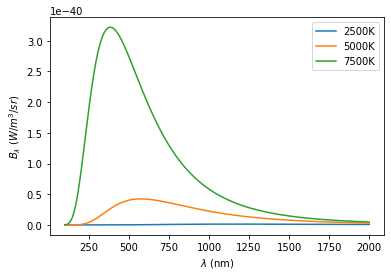

In [18]:
def planck(lam, T):
    """
    A function to calculate the spectral radiance using the Planck's law
    Inputs:
    ------
    lam: wavelength and T: temperature
    Returns :
    -------
    B_lam: spectral radiance
    """

    # add units to inputs


    B_lam = 2 * const.h * const.c / ((lam * u.nm)**5 * np.e**((const.h * const.c)/ ((lam * u.nm) * const.k_B * (T * u.Kelvin))))

    return B_lam

lam = np.linspace(100, 2000, 1000)

temp = [2500, 5000, 7500]

for T in temp:
    plt.plot(lam, planck(lam, T), label=str(T)+"K")

plt.xlabel(r"$\lambda$ (nm)")
plt.ylabel(r"$B_{\lambda}$ $(W/m^3/sr)$")
plt.legend()
plt.show()

**Exercise 6:** Can you replicate this plot using NumPy and matplotlib?

<br>
<div>
<img src="https://github.com/ridha-mm/mass-agn/blob/main/assets/example.png?raw=1" width="400"/>
</div>

Hints:
- you can generate dummy data using [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function.
- you can use [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to select relevant part of the parameter space.

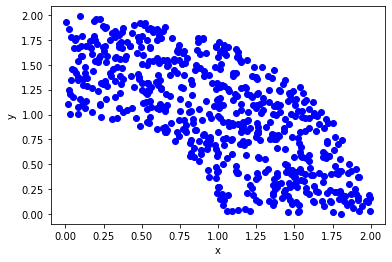

In [60]:
x = np.random.uniform(0, 2, 1000)
y = np.random.uniform(0, 2, 1000)

table = pd.DataFrame()
table['x'] = x
table['y'] = y
table['distance'] = np.sqrt(x**2 + y**2)
table['bound_1'] = table['distance'] >= 1
table['bound_2'] = table['distance'] <= 2

table = table[table['bound_1'] & table['bound_2']]

plt.scatter(table['x'], table['y'], c="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.show()